# Lecture 2: k-Nearest Neighbors and Handwritten Digit Classification

In this example, we'll use k-NN to classify 8x8 pixel images of hand-written digits.  The k-NN classifier is park of scikit-learn:

[http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors, preprocessing
import numpy as np

/Users/civisemployee/anaconda3/envs/civis/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


The dataset consists of 1,797 images, each 8 pixels by 8 pixels.  The "target" field has the label, telling us the true digit the image represents.

In [3]:
# The digits dataset
digits = datasets.load_digits()

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Here, we define a function that takes an image and the true label and plots it for us:

In [6]:
def plot_handwritten_digit(the_image, label): # plot_handwritten_digit<-function(the_image, label)
    plt.axis('off')
    plt.imshow(the_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [7]:
# this will show us the pixel values
image_num = 1000
digits.images[image_num]

array([[  0.,   0.,   1.,  14.,   2.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  16.,   5.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  14.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   3.,  14.,   6.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   8.,  12.,   0.,   0.],
       [  0.,   0.,  10.,  14.,  13.,  16.,   8.,   3.],
       [  0.,   0.,   2.,  11.,  12.,  15.,  16.,  15.]])

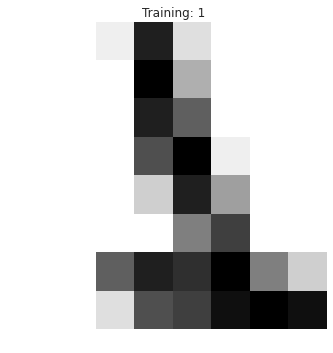

In [8]:
# and then we can plot them
plot_handwritten_digit(digits.images[image_num], digits.target[image_num])

Instead of each image being 8x8 pixels, we flatten it to just be a single row of 64 numbers:

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, 64))
labels = digits.target

In [9]:
data.shape

(1797, 64)

If we need to standardize the features (make them all have mean zero and standard deviation one), this is how we do it:

In [10]:
data_scaled = preprocessing.scale(data)
data_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [11]:
data.mean(axis=0)

array([  0.00000000e+00,   3.03839733e-01,   5.20478575e+00,
         1.18358375e+01,   1.18480801e+01,   5.78185865e+00,
         1.36227045e+00,   1.29660545e-01,   5.56483027e-03,
         1.99387869e+00,   1.03823038e+01,   1.19794101e+01,
         1.02793545e+01,   8.17584864e+00,   1.84641068e+00,
         1.07957707e-01,   2.78241514e-03,   2.60155815e+00,
         9.90317195e+00,   6.99276572e+00,   7.09794101e+00,
         7.80634391e+00,   1.78853645e+00,   5.00834725e-02,
         1.11296605e-03,   2.46967168e+00,   9.09126322e+00,
         8.82136895e+00,   9.92710072e+00,   7.55147468e+00,
         2.31775181e+00,   2.22593211e-03,   0.00000000e+00,
         2.33945465e+00,   7.66722315e+00,   9.07178631e+00,
         1.03016138e+01,   8.74401781e+00,   2.90929327e+00,
         0.00000000e+00,   8.90372844e-03,   1.58375070e+00,
         6.88146912e+00,   7.22815804e+00,   7.67223150e+00,
         8.23650529e+00,   3.45631608e+00,   2.72676683e-02,
         7.23427935e-03,

In [12]:
data_scaled.mean(axis=0)

array([  0.00000000e+00,  -2.56086502e-16,  -2.34771702e-16,
        -3.05326777e-16,   1.39689163e-16,  -3.16941798e-16,
        -9.59598443e-16,   6.06946633e-16,  -4.62368967e-16,
         7.55084971e-17,  -5.33796713e-17,   5.71483749e-17,
         4.52862258e-17,  -1.49512505e-17,   8.96580775e-16,
        -2.17719863e-16,  -6.87973761e-16,  -7.70421876e-17,
         2.59978769e-16,   2.32547550e-16,   1.05878949e-16,
        -1.40863021e-16,  -1.15408826e-16,  -2.26477465e-16,
         4.51109193e-16,   3.79341646e-17,  -7.71657517e-17,
        -9.60092699e-17,  -8.72980041e-17,  -1.50624582e-16,
        -1.05597840e-15,  -2.52140175e-16,   0.00000000e+00,
         3.42148865e-16,   1.21710593e-16,  -1.07871419e-16,
        -2.00606242e-16,  -1.09354188e-17,  -7.12964591e-17,
         0.00000000e+00,   3.00716294e-16,  -1.74657790e-16,
         4.03436636e-16,   1.92111213e-16,   2.61337974e-17,
         5.38739275e-17,   4.71396866e-17,   8.63759074e-16,
         2.62048467e-16,

Make a training set and a test set.  We'll use the nearest neighbors from the training set to classify each image from the test set.

In [13]:
n_train = int(0.9*n_samples)

X_train = data[:n_train]
y_train = labels[:n_train]
X_test = data[n_train:]
# re-shape this back so we can plot it again as an image
test_images = X_test.reshape((len(X_test), 8, 8))
y_test = labels[n_train:]

In [14]:
X_train.shape

(1617, 64)

Scikit-learn classifiers generally have a standard programming interface.  You construct the class:

In [15]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

You fit it to your data:

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

And you predict on new data:

In [17]:
pred_labels = knn.predict(X_test)
pred_labels

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 3, 5, 8, 4, 5,
       0, 8, 9, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,
       1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 2, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 5, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4,
       4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 1, 4, 9, 0, 8, 9, 8])

In [18]:
pred_probs = knn.predict_proba(X_test)
pred_probs

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.2,  0.8],
       [ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ]])

true label is 4
predicted label is 4
predicted probabilities are [ 0.   0.   0.   0.   0.4  0.   0.   0.2  0.   0.4]


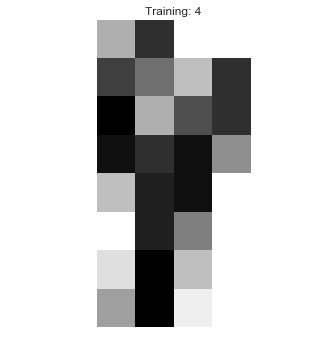

In [20]:
test_num = 11
plot_handwritten_digit(test_images[test_num], y_test[test_num])
print("true label is %s" % y_test[test_num])
print("predicted label is %s" % pred_labels[test_num])
print("predicted probabilities are %s" % pred_probs[test_num])

Let's find examples where the predicted label is wrong:

In [21]:
np.where(pred_labels != y_test)

(array([ 41,  43,  45,  49, 110, 148, 173]),)